In [9]:
import pandas as pd
import os
from os.path import join, splitext
import numpy as np
import pandas as pd
from pprint import pprint
from scipy import stats, integrate
import math

dirname = 'VAF' #'ncm_from_bams'
data_by_fname = dict()

# tips = sns.load_dataset('tips')
# tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
# grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
# grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

for fname in os.listdir(dirname):
    if fname.endswith('.vaf'):
        fpath = join(dirname, fname)
        print(f'Reading {fpath}')
        ncm = pd.read_table(fpath)
#         ncm = ncm[ncm['vaf'] != 'NA']
        #print(ncm[ncm['vaf'].notnull()])
        ncm['vaf'].dropna()
        data = pd.Series([v for v in ncm['vaf'] if not math.isnan(v)], name=splitext(fname)[0])
        print(f'Len: {len(data)}')
        data_by_fname[fname] = data
#        sns.distplot(data, hist=True, rug=True)
#         plt.subplot(221)


Reading VAF/PRJ180047_E167-T02-D_S13_R1_001.fastq.gz.vaf
Len: 11623
Reading VAF/PRJ180048_E167-B01-D_S14_R1_001.fastq.gz.vaf
Len: 11578
Reading VAF/PRJ180046_E167-T01-D_S12_R1_001.fastq.gz.vaf
Len: 11621
Reading VAF/PRJ170183_NIH38-PT-1_T_S5_R1_001.fastq.gz.vaf
Len: 11614


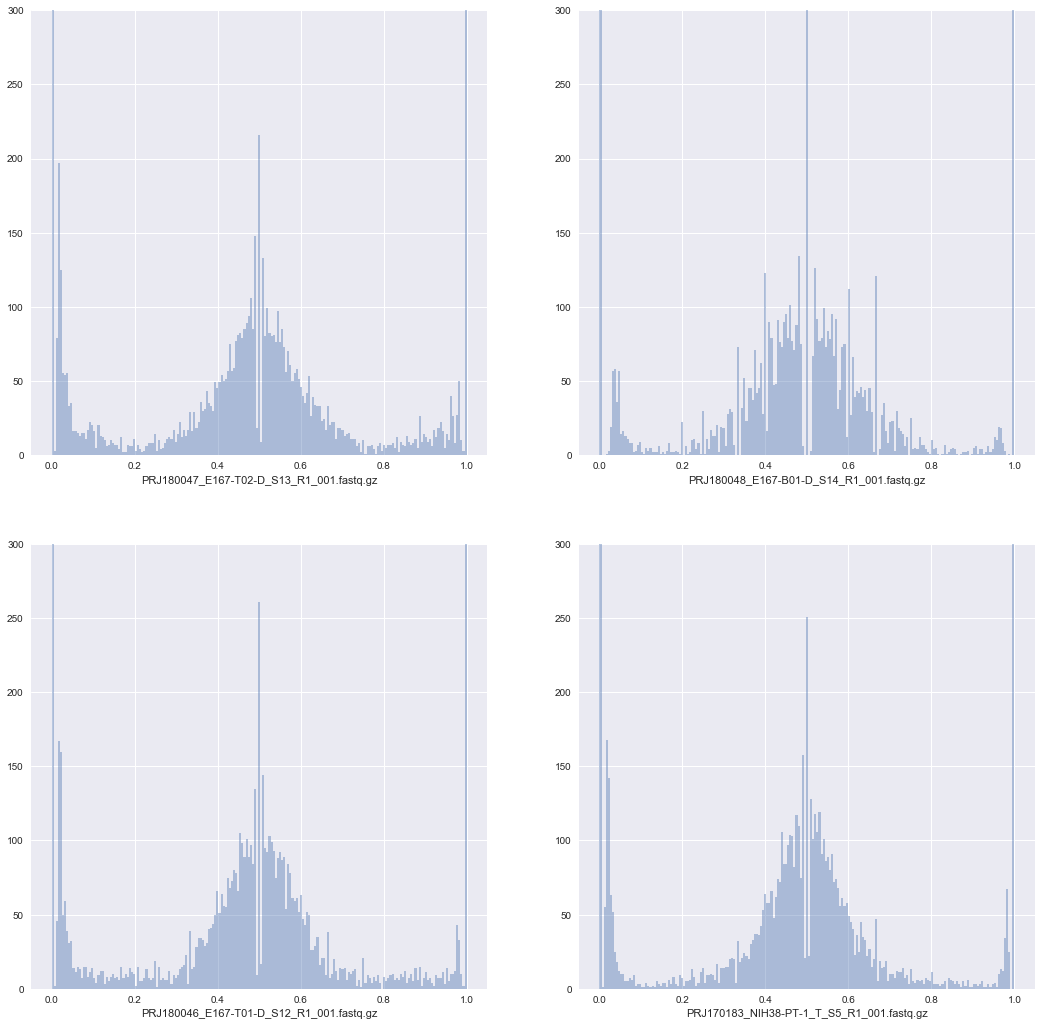

In [25]:
import pandas as pd
import os
from os.path import join
import numpy as np
import pandas as pd
from pprint import pprint
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set_style("white")
import math
import matplotlib.gridspec as gridspec

# tips = sns.load_dataset('tips')
# tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
# grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
# grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

#         sns.distplot(datas[-1], hist=True, rug=True)

fig = plt.figure(figsize=(18, 18))
gs = gridspec.GridSpec(2, 2)
# f, axes = plt.subplots(len(datas))

for i, (fname, data) in enumerate(data_by_fname.items()):
    #sns.regplot(x, y, ax=ax1)
    ax = plt.subplot(gs[i])
    sns.distplot(data, hist=True, kde=False, ax=ax, bins=np.linspace(0, 1, 200),
        hist_kws={'range': (0.0, 1.0)}
    )
    ax.set_ylim(0, 300)

#    sns.kdeplot(data['vaf'], ax=ax)
